In [1]:
%load_ext autoreload
%autoreload 2
%config InlineBackend.figure_format="retina"

In [ ]:
import sys
from pygv.viewer import GenomeViewer
from pygv.tracks.bigwig_track import PairedStrandSpecificTracks, BigWigTrack, PairedStrandlessTrack
from pygv.tracks.bed_track import BedTrack
sys.path.append("/local/storage/ly349/projects/Deconvolution/Notebooks/")

In [ ]:
from customized_styles import _pos_color, _neg_color
from utils import get_bioqueue_file

## Initiation

In [4]:
gv_obj = GenomeViewer(inward_ticks=True, n_ticks=3)
_cell_labels = ("K562", "GM12878", "MCF7")
for i, label in enumerate(_cell_labels):
    _target = PairedStrandSpecificTracks(
        get_bioqueue_file("{{History:12347-%s.ds.pl.bw}}" % label),
        get_bioqueue_file("{{History:12347-%s.ds.mn.bw}}" % label),
        name="Initiation", pos_color=_pos_color, neg_color=_neg_color, 
        y_tick_format="{:0.1f}", 
        height=0.8
    )
    _target.data_transform = "asinh"
    gv_obj.add_track(_target)
    _pred = PairedStrandSpecificTracks(
        (
            get_bioqueue_file("{{History:20070-%s.pl.bw}}" % label.lower()),
            get_bioqueue_file("{{History:20071-%s.pl.bw}}" % label.lower()),
            get_bioqueue_file("{{History:20072-%s.pl.bw}}" % label.lower()),
        ),
        (
            get_bioqueue_file("{{History:20070-%s.mn.bw}}" % label.lower()),
            get_bioqueue_file("{{History:20071-%s.mn.bw}}" % label.lower()),
            get_bioqueue_file("{{History:20072-%s.mn.bw}}" % label.lower()),
        ),
        name="Deep-\nDETAILS", pos_color=_pos_color, neg_color=_neg_color, y_tick_format="{:0.1f}", 
        height=0.8
    )
    _pred.data_transform = "asinh"
    gv_obj.add_track(_pred)
    
    _ccre = BedTrack(f"/local/storage/ly349/projects/Deconvolution/Data/Refs/{label}_cCRE_v4.bed.gz", height=0.1, show_name=False)
    _ccre.edge_color = None
    gv_obj.add_track(_ccre)
    
    acc = BigWigTrack(
        get_bioqueue_file("{{History:12347-atac_ds.%s.bw}}" % label),
        name="ATAC-seq", color="#dad7cd", y_tick_format="{:0.1f}", height=0.6)
    acc.data_transform = "asinh"
    gv_obj.add_track(acc)

annot = BedTrack(
    "/local/storage/ly349/projects/Deconvolution/Data/Refs/ncbi_refseq.ucsc020724.bed.gz", 
    height=0.3, show_name=True, name="RefSeq")
# annot.block_line_width = 0
annot.edge_color = "#5E5E5E"
annot.color = "#5E5E5E"
annot.allowed_feature_lanes = 1
gv_obj.add_track(annot)

gv_obj.add_group_autoscale([0, 4, 8])
gv_obj.add_group_autoscale([1, 5, 9])
gv_obj.add_group_autoscale([3, 7, 11])

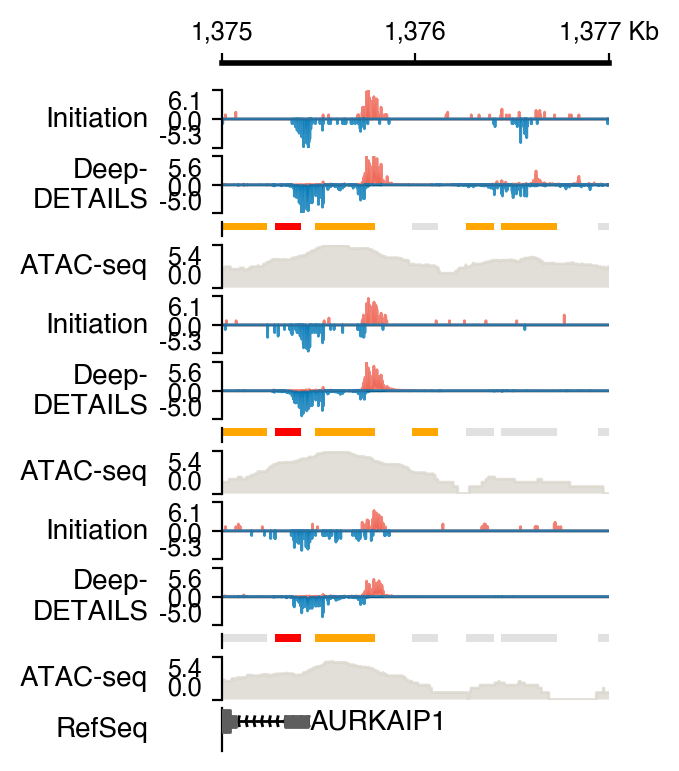

In [ ]:
gv_obj.plot("chr1", 1374705, 1376956, fig_width=2.5, height_scale_factor=0.55, hide_chromosome_name=True)

## H3K27ac

In [6]:
gv2 = GenomeViewer(inward_ticks=True, n_ticks=3)
gv_obj = gv2
for i, label in enumerate(("K562", "GM12878", "MCF7")):
    c = PairedStrandlessTrack(
        get_bioqueue_file("{{History:12597-%s.ds.pl.bw}}" % label),
        get_bioqueue_file("{{History:12597-%s.ds.mn.bw}}" % label),
        name="H3K27ac", pos_color=_pos_color, neg_color=_neg_color, y_tick_format="{:0.1f}", 
        stat_method="mean", n_bins=500, color="#99d98c", height=0.8
    )
    gv_obj.add_track(c)
    
    naive = BigWigTrack(
        (
            get_bioqueue_file("{{History:20092-%s.pl.bw}}" % label.lower()),
            get_bioqueue_file("{{History:20093-%s.pl.bw}}" % label.lower()),
            get_bioqueue_file("{{History:20094-%s.pl.bw}}" % label.lower())
        ), 
        name="Deep-\nDETAILS", pos_color=_pos_color, neg_color=_neg_color, y_tick_format="{:0.1f}", 
        stat_method="mean", n_bins=500, color="#168aad", height=0.8
    )
    gv_obj.add_track(naive)
    
    _ccre = BedTrack(f"/local/storage/ly349/projects/Deconvolution/Data/Refs/{label}_cCRE_v4.bed.gz", height=0.1, show_name=False)
    _ccre.edge_color = None
    gv_obj.add_track(_ccre)
        
    acc = BigWigTrack(
        get_bioqueue_file("{{History:12597-atac_ds.%s.bw}}" % label),
        name="ATAC-seq", color="#dad7cd", y_tick_format="{:0.1f}", height=0.6,
        stat_method="mean", n_bins=500)
    acc.data_transform = "asinh"
    gv_obj.add_track(acc)

annot = BedTrack(
    "/local/storage/ly349/projects/Deconvolution/Data/Refs/ncbi_refseq.ucsc020724.bed.gz", 
    height=0.3, show_name=True, name="RefSeq")
annot.edge_color = "#5E5E5E"
annot.color = "#5E5E5E"
annot.allowed_feature_lanes = 1
gv_obj.add_track(annot)

gv_obj.add_group_autoscale([0, 4, 8])
gv_obj.add_group_autoscale([1, 5, 9])
gv_obj.add_group_autoscale([3, 7, 11])

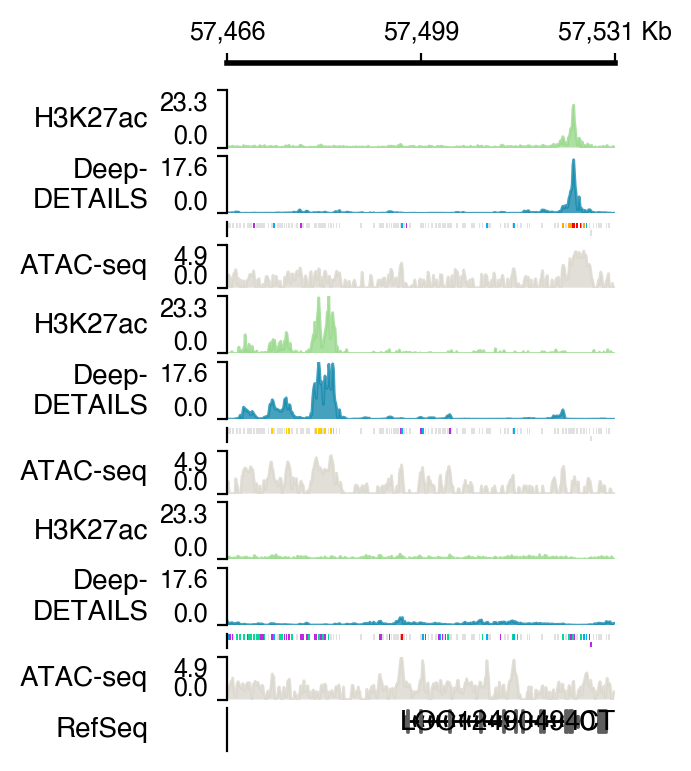

In [ ]:
gv_obj.plot("chr20", 57465866, 57531435, fig_width=2.5, height_scale_factor=0.55, hide_chromosome_name=True)

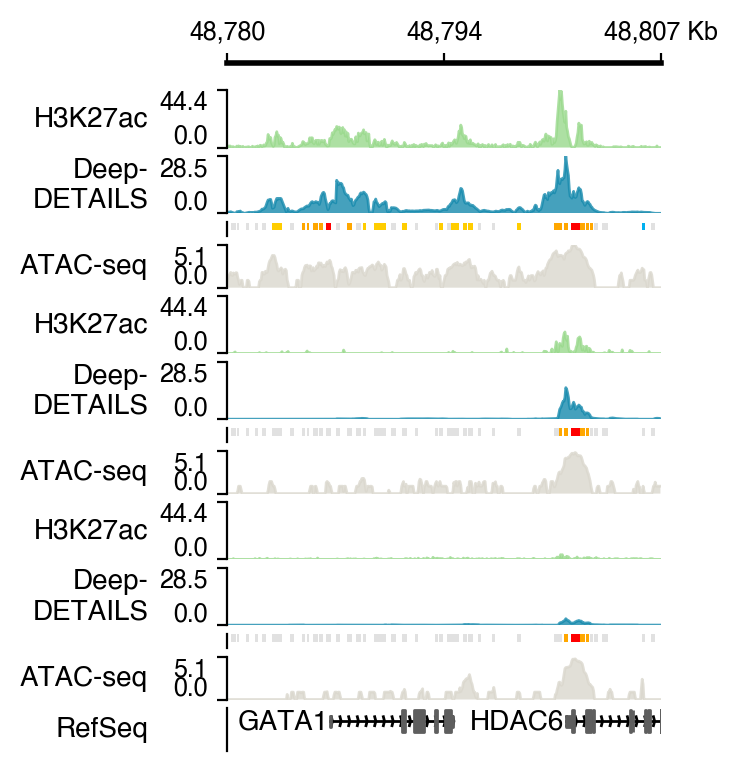

In [ ]:
gv_obj.plot("chrX", 48780120, 48807423, fig_width=2.8, height_scale_factor=0.55, hide_chromosome_name=True)

## H3K4me1

In [9]:
gv3 = GenomeViewer(inward_ticks=True, n_ticks=3)
gv_obj = gv3
for i, label in enumerate(("K562", "GM12878", "MCF7")):
    c = PairedStrandlessTrack(
        get_bioqueue_file("{{History:12596-%s.ds.pl.bw}}" % label),
        get_bioqueue_file("{{History:12596-%s.ds.mn.bw}}" % label),
        name="H3K4me1", pos_color=_pos_color, neg_color=_neg_color, y_tick_format="{:0.1f}", 
        stat_method="mean", n_bins=500, color="#76c893", height=0.8
    )
    gv_obj.add_track(c)
    
    naive = BigWigTrack(
        (
            get_bioqueue_file("{{History:20167-%s.pl.bw}}" % label.lower()),
            get_bioqueue_file("{{History:20168-%s.pl.bw}}" % label.lower()),
            get_bioqueue_file("{{History:20169-%s.pl.bw}}" % label.lower())
        ), 
        name="Deep-\nDETAILS", pos_color=_pos_color, neg_color=_neg_color, y_tick_format="{:0.1f}", 
        stat_method="mean", n_bins=500, color="#1a759f", height=0.8
    )
    gv_obj.add_track(naive)
    
    _ccre = BedTrack(f"/local/storage/ly349/projects/Deconvolution/Data/Refs/{label}_cCRE_v4.bed.gz", height=0.1, show_name=False)
    _ccre.edge_color = None
    gv_obj.add_track(_ccre)
        
    acc = BigWigTrack(
        get_bioqueue_file("{{History:12596-atac_ds.%s.bw}}" % label),
        name="ATAC-seq", color="#dad7cd", y_tick_format="{:0.1f}", height=0.6,
        stat_method="mean", n_bins=500)
    acc.data_transform = "asinh"
    gv_obj.add_track(acc)

annot = BedTrack(
    "/local/storage/ly349/projects/Deconvolution/Data/Refs/ncbi_refseq.ucsc020724.bed.gz", 
    height=0.3, show_name=True, name="RefSeq")
annot.edge_color = "#5E5E5E"
annot.color = "#5E5E5E"
annot.allowed_feature_lanes = 1
gv_obj.add_track(annot)

gv_obj.add_group_autoscale([0, 4, 8])
gv_obj.add_group_autoscale([1, 5, 9])
gv_obj.add_group_autoscale([3, 7, 11])

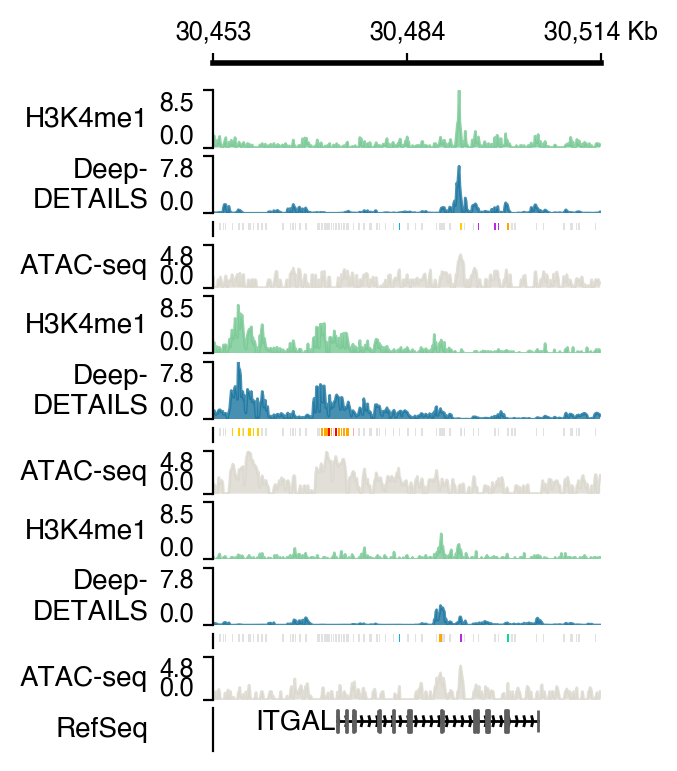

In [ ]:
gv3.plot("chr16", 30453394, 30514044, fig_width=2.5, height_scale_factor=0.55, hide_chromosome_name=True)

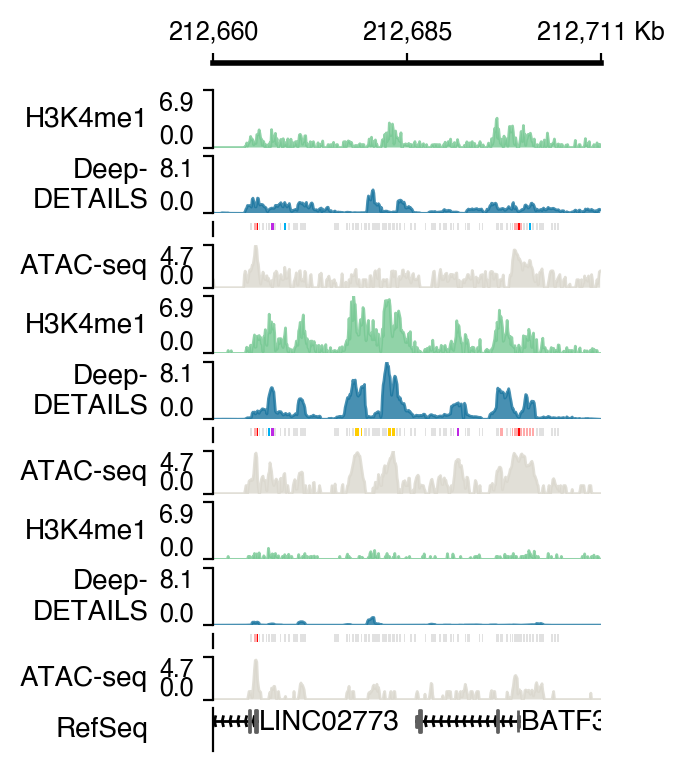

In [ ]:
gv3.plot("chr1", 212659944, 212710521, fig_width=2.5, height_scale_factor=0.55, hide_chromosome_name=True)

## H3K4me3

In [12]:
gv4 = GenomeViewer(inward_ticks=True, n_ticks=3)
gv_obj = gv4
for i, label in enumerate(("K562", "GM12878", "MCF7")):
    c = PairedStrandlessTrack(
        get_bioqueue_file("{{History:12565-%s.ds.pl.bw}}" % label),
        get_bioqueue_file("{{History:12565-%s.ds.mn.bw}}" % label),
        name="H3K4me3", pos_color=_pos_color, neg_color=_neg_color, y_tick_format="{:0.1f}", 
        stat_method="mean", n_bins=500, color="#76c893", height=0.8
    )
    gv_obj.add_track(c)
    
    naive = BigWigTrack(
        (
            get_bioqueue_file("{{History:20708-%s.pl.bw}}" % label.lower()),
            get_bioqueue_file("{{History:20709-%s.pl.bw}}" % label.lower()),
            get_bioqueue_file("{{History:20710-%s.pl.bw}}" % label.lower())
        ), 
        name="Deep-\nDETAILS", pos_color=_pos_color, neg_color=_neg_color, y_tick_format="{:0.1f}", 
        stat_method="mean", n_bins=500, color="#1a759f", height=0.8
    )
    gv_obj.add_track(naive)
    
    _ccre = BedTrack(f"/local/storage/ly349/projects/Deconvolution/Data/Refs/{label}_cCRE_v4.bed.gz", height=0.1, show_name=False)
    _ccre.edge_color = None
    gv_obj.add_track(_ccre)
        
    acc = BigWigTrack(
        get_bioqueue_file("{{History:12565-atac_ds.%s.bw}}" % label),
        name="ATAC-seq", color="#dad7cd", y_tick_format="{:0.1f}", height=0.6,
        stat_method="mean", n_bins=500)
    acc.data_transform = "asinh"
    gv_obj.add_track(acc)

annot = BedTrack(
    "/local/storage/ly349/projects/Deconvolution/Data/Refs/ncbi_refseq.ucsc020724.bed.gz", 
    height=0.3, show_name=True, name="RefSeq")
annot.edge_color = "#5E5E5E"
annot.color = "#5E5E5E"
annot.allowed_feature_lanes = 1
gv_obj.add_track(annot)

gv_obj.add_group_autoscale([0, 4, 8])
gv_obj.add_group_autoscale([1, 5, 9])
gv_obj.add_group_autoscale([3, 7, 11])

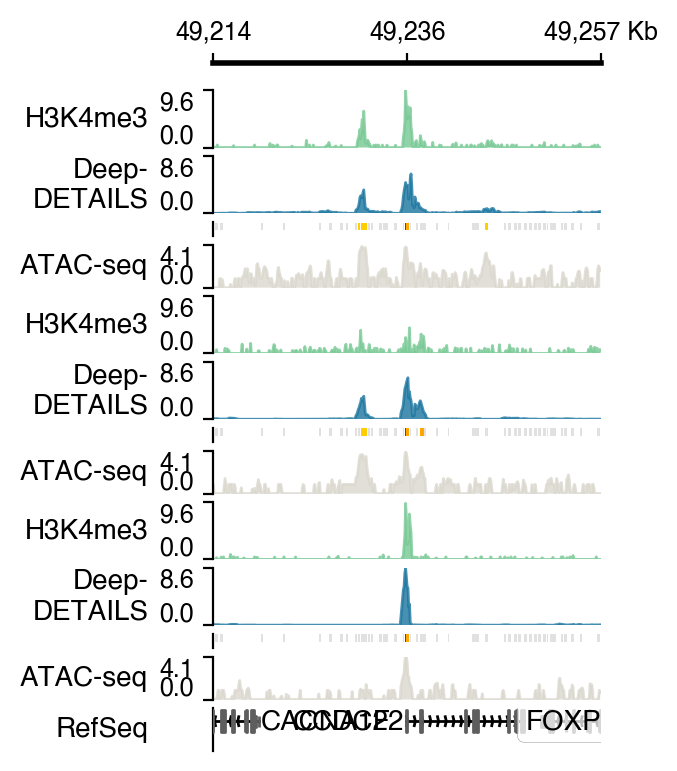

In [ ]:
gv4.plot("chrX", 49214292, 49257013, fig_width=2.5, height_scale_factor=0.55, hide_chromosome_name=True)

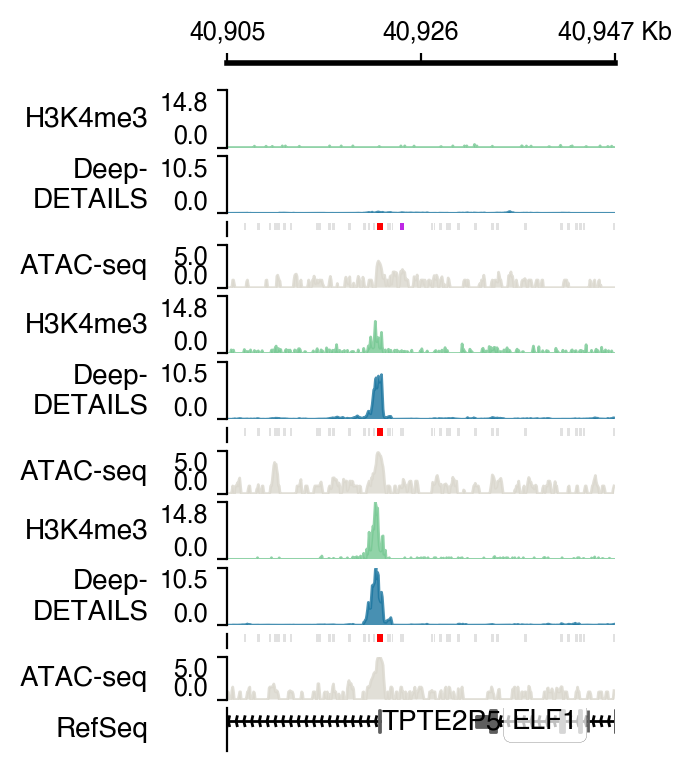

In [ ]:
gv4.plot("chr13", 40905450, 40946732, fig_width=2.5, height_scale_factor=0.55, hide_chromosome_name=True)

## Elongation and pausing

In [15]:
gv5 = GenomeViewer(inward_ticks=True, n_ticks=3)
labels_3d2 = ("HCT116", "K562", "MCF10A")
for i, label in enumerate(labels_3d2):
    c = PairedStrandSpecificTracks(
        get_bioqueue_file("{{History:12598-%s.ds.pl.bw}}" % label),
        get_bioqueue_file("{{History:12598-%s.ds.mn.bw}}" % label),
        name="Pause-\nrelease", pos_color=_pos_color, neg_color=_neg_color, y_tick_format="{:0.1f}", 
        height=0.8
    )
    gv5.add_track(c)
    naive = PairedStrandSpecificTracks(
        get_bioqueue_file("{{History:13917-C%d.pl.bw}}" % i),
        get_bioqueue_file("{{History:13917-C%d.mn.bw}}" % i),
        name="Deep-\nDETAILS", pos_color=_pos_color, neg_color=_neg_color, y_tick_format="{:0.1f}", 
        height=0.8
    )
    gv5.add_track(naive)
    
    _ccre = BedTrack(f"/local/storage/ly349/projects/Deconvolution/Data/Refs/{label}_cCRE_v4.bed.gz", height=0.1, show_name=False)
    _ccre.edge_color = None
    gv5.add_track(_ccre)
        
    acc = BigWigTrack(get_bioqueue_file("{{History:12598-atac_ds.%s.bw}}" % label),
                      name="ATAC-seq", color="#dad7cd", y_tick_format="{:0.1f}", height=0.6)
    acc.data_transform = "asinh"
    gv5.add_track(acc)

annot = BedTrack(
    "/local/storage/ly349/projects/Deconvolution/Data/Refs/ncbi_refseq.ucsc020724.bed.gz", 
    height=0.3, show_name=True, name="RefSeq")
# annot.block_line_width = 0
annot.edge_color = "#5E5E5E"
annot.color = "#5E5E5E"
annot.allowed_feature_lanes = 1
gv5.add_track(annot)
gv5.add_group_autoscale([0, 4, 8])
gv5.add_group_autoscale([1, 5, 9])
gv5.add_group_autoscale([3, 7, 11])

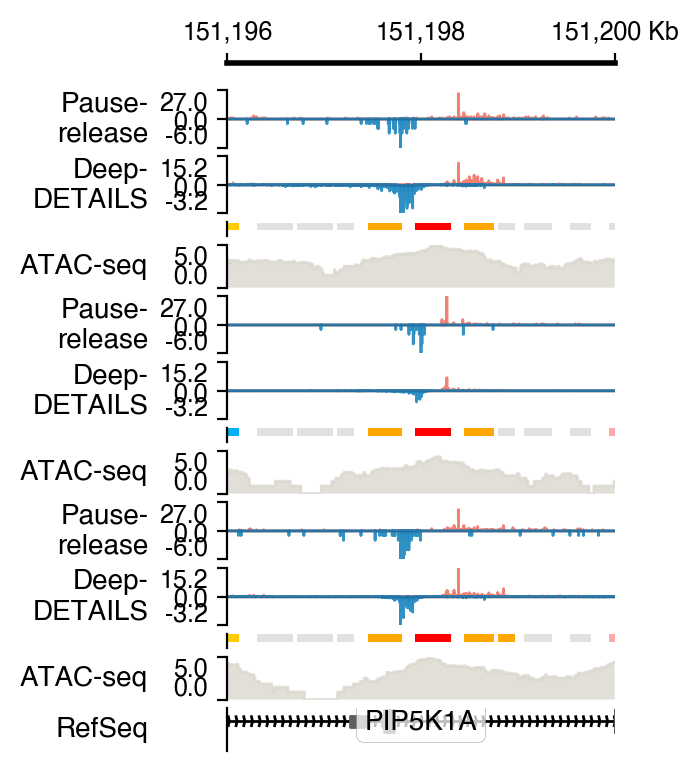

In [ ]:
gv5.plot("chr1", 151196498, 151200263, fig_width=2.5, height_scale_factor=0.55, hide_chromosome_name=True)